# Apple Leave Disease Detection using CNN

This stage of the task aims to visualize apple leaves dataset using

In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.5/38.8 MB 8.4 MB/s eta 0:00:05
   - -------------------------------------- 1.3/38.8 MB 13.7 MB/s eta 0:00:03
   -- ------------------------------------- 2.3/38.8 MB 14.4 MB/s eta 0:00:03
   --- ------------------------------------ 3.0/38.8 MB 16.0 MB/s eta 0:00:03
   ---- ----------------------------------- 4.4/38.8 MB 20.1 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/38.8 MB 22.5 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.8 MB 25.9 MB/s eta 0:00:02
   ---------- ----------------------------- 10.7/38.8 MB 36.3 MB/s eta 0:00:01
   ------------- -------------------------- 13.1/38.8 MB 50.1 MB/s eta 0:00:01
   ---------------- ----------------------- 16.1/38.8 MB 59.8 MB/s eta 0

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 2.3/390.2 MB 48.4 MB/s eta 0:00:09
    --------------------------------------- 7.1/390.2 MB 75.4 MB/s eta 0:00:06
   - ------------------------------------- 12.0/390.2 MB 131.2 MB/s eta 0:00:03
   - -------------------------------------- 13.0/390.2 MB 93.9 MB/s eta 0:00:05
   - -------------------------------------- 13.6/390.2 MB 81.8 MB/s eta 0:00:05
   - -------------------------------------- 13.6/390.2 MB 81.8 MB/s eta 0:00:05
   - -------------------------------------- 13.6/390.2 MB 81.8 MB/s eta 0:00:05
   - -------------------------------------- 13.6/390.2 MB 81.8 MB/s eta 0:00:05
   - -------------------------------------- 13.6/390.2 MB 81.8 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load and Prepare the Dataset

In [1]:
import glob
import cv2
import numpy as np

In [2]:
# Initialize lists to hold the images and labels
Apple_Apple_scab = []
Apple_Black_rot = []
Apple_Cedar_apple_rust = []
Apple_healthy = []

# Load apple scab images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Apple_scab/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Apple_scab.append(img)

# Load apple black rot images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Black_rot/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Black_rot.append(img)

# Load cedar apple rust images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Cedar_apple_rust/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Cedar_apple_rust.append(img)

# Load apple healthy images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___healthy/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_healthy.append(img)

In [3]:
# Convert lists to numpy arrays
Apple_Apple_scab = np.array(Apple_Apple_scab)
Apple_Black_rot = np.array(Apple_Black_rot)
Apple_Cedar_apple_rust = np.array(Apple_Cedar_apple_rust)
Apple_healthy = np.array(Apple_healthy)
d_s = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy))

In [4]:
Apple_Apple_scab.shape

(630, 224, 224, 3)

In [5]:
Apple_Black_rot.shape

(621, 224, 224, 3)

In [6]:
Apple_Cedar_apple_rust.shape

(275, 224, 224, 3)

In [7]:
Apple_healthy.shape

(989, 224, 224, 3)

In [8]:
d_s.shape

(2515, 224, 224, 3)

In [9]:
np.random.choice(10, 5, replace=False)

array([8, 1, 0, 7, 5])

## Visualize the Dataset

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
def plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5):
    Apple_Apple_scab_imgs = Apple_Apple_scab[np.random.choice(Apple_Apple_scab.shape[0], num, replace=False)]
    Apple_Black_rot_imgs = Apple_Black_rot[np.random.choice(Apple_Black_rot.shape[0], num, replace=False)]
    Apple_Cedar_apple_rust_imgs = Apple_Cedar_apple_rust[np.random.choice(Apple_Cedar_apple_rust.shape[0], num, replace=False)]
    Apple_healthy_imgs = Apple_healthy[np.random.choice(Apple_healthy.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Apple scab')
        plt.imshow(Apple_Apple_scab_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Black rot')
        plt.imshow(Apple_Black_rot_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Cedar apple rust')
        plt.imshow(Apple_Cedar_apple_rust_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple healthy')
        plt.imshow(Apple_healthy_imgs[i])

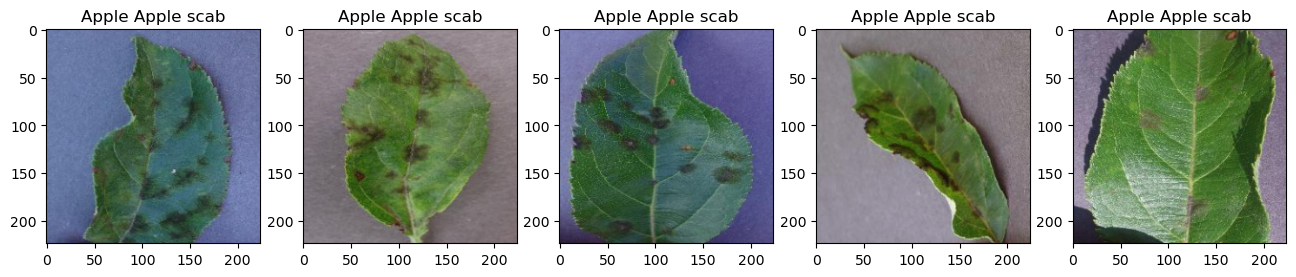

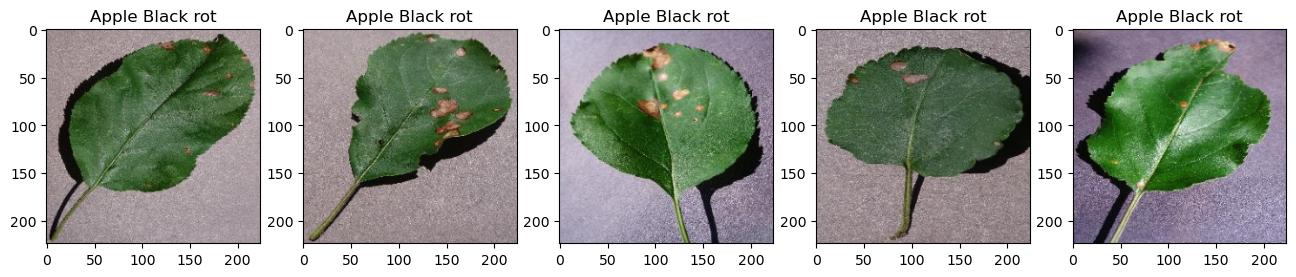

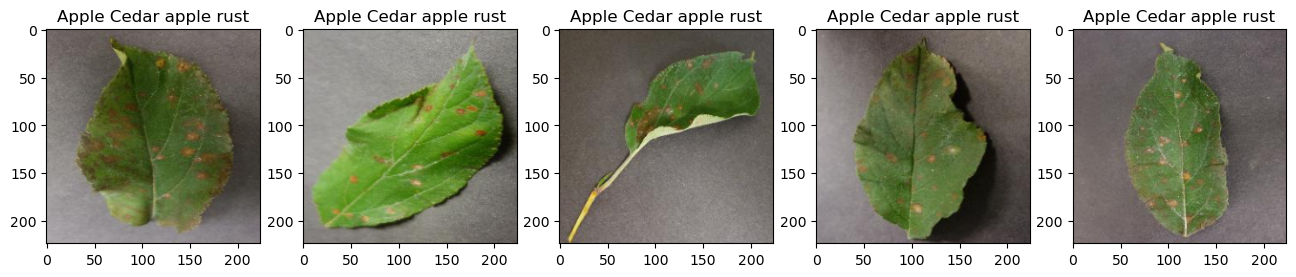

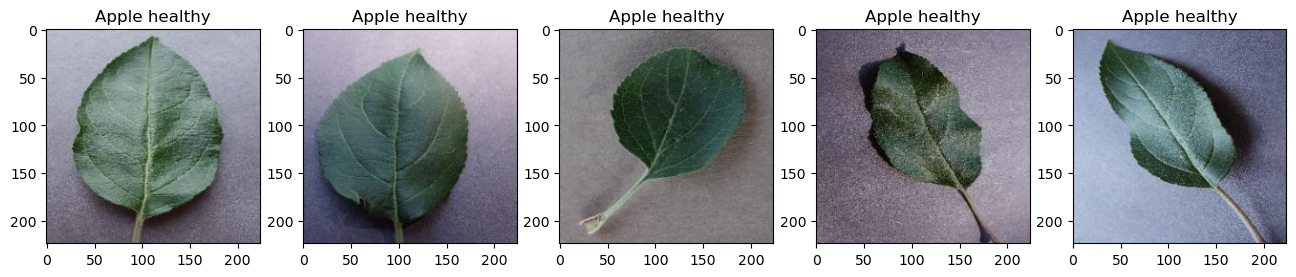

In [12]:
plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5)

In [13]:
# Prepare labels
Apple_Apple_scab_labels = np.full(len(Apple_Apple_scab), 0)
Apple_Black_rot_labels = np.full(len(Apple_Black_rot), 1)
Apple_Cedar_apple_rust_labels = np.full(len(Apple_Cedar_apple_rust), 2)
Apple_healthy_labels = np.full(len(Apple_healthy), 3)

In [14]:
# Concatenate data and labels
images = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy), axis=0)
labels = np.concatenate((Apple_Apple_scab_labels, Apple_Black_rot_labels, Apple_Cedar_apple_rust_labels, Apple_healthy_labels), axis=0)

In [15]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Design CNN Model

In [18]:
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Add, PReLU, UpSampling2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import layers, models

In [19]:
# Update the model's output layer for multi-class classification
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Input layer with the shape of images
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),  # Third convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D data to 1D
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(4, activation='softmax')  # Output layer with 4 neurons for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN Model

In [20]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step - accuracy: 0.5117 - loss: 1.5028 - val_accuracy: 0.8708 - val_loss: 0.4269
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.8780 - loss: 0.3475 - val_accuracy: 0.8946 - val_loss: 0.3260
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8892 - loss: 0.3093 - val_accuracy: 0.9185 - val_loss: 0.2574
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.9272 - loss: 0.1924 - val_accuracy: 0.8986 - val_loss: 0.3234
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9413 - loss: 0.1549 - val_accuracy: 0.9264 - val_loss: 0.2511
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.9660 - loss: 0.1061 - val_accuracy: 0.9085 - val_loss: 0.2991
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9692 - loss: 0.0909 - val_accuracy: 0.9264 - val_loss: 0.2802
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9752 - loss: 0.0730 - val_accu

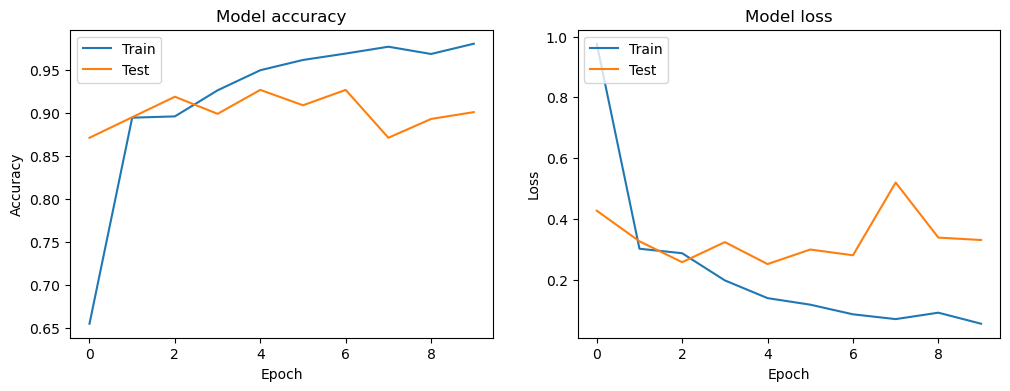

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8989 - loss: 0.3412
Test Loss: 0.3304
Test Accuracy: 0.9006


In [27]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']


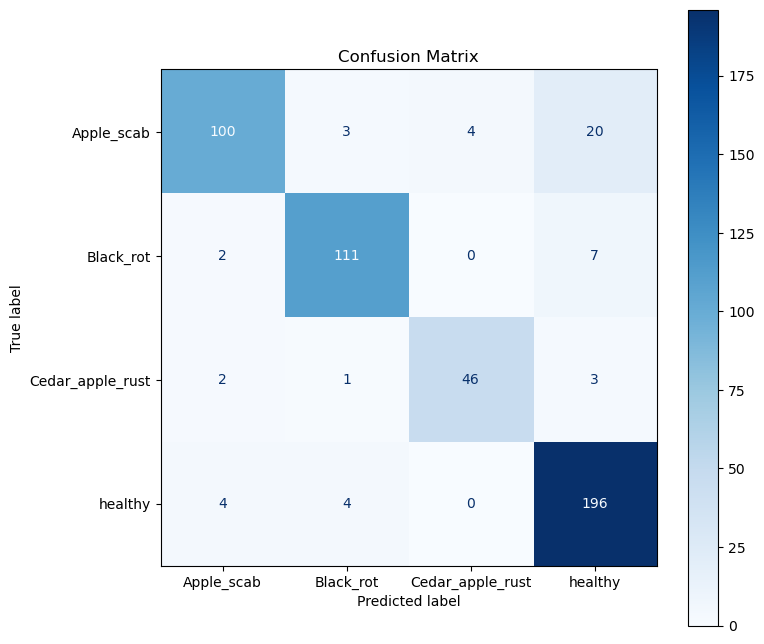

In [33]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [34]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.93      0.79      0.85       127
       Black_rot       0.93      0.93      0.93       120
Cedar_apple_rust       0.92      0.88      0.90        52
         healthy       0.87      0.96      0.91       204

        accuracy                           0.90       503
       macro avg       0.91      0.89      0.90       503
    weighted avg       0.90      0.90      0.90       503

